# 3.4 保存提取

In [1]:
import torch
import torch.nn.functional as fun
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 创建假数据

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #shape=(100,1)
y = x.pow(2) + 0.2*torch.rand(x.size()) #shape=(100,1)

### 2. 保存网络

In [3]:
def save():
    #定义网络1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # 作图
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    #保存
    torch.save(net1,'net.pkl') #保存整个网络
    torch.save(net1.state_dict(),'net_params.pkl') #保存网络参数
        

### 3. 提取网络

In [4]:
def restore_net():
    #加载网络
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    # 作图
    plt.figure(1, figsize=(10, 3))
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_params():
    #先建立和net1一样的网络
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # 作图
    plt.figure(1, figsize=(10, 3))
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

### 4. 测试

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


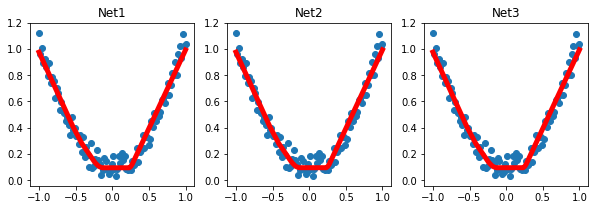

In [5]:
save()
restore_net()
restore_params()